<p style="text-align: center;"><strong> FACULDADE DE ENGENHARIA DE SOROCABA - FACENS</strong>
    <br />
    PÓS GRADUAÇÃO EM ESPECIALIZAÇÃO EM CIÊNCIA DE DADOS
</p>
<h2>&nbsp;</h2>

<p style="text-align: center;"><strong>ALEX COELHO ABRANTES</strong></p>
<p style="text-align: center;"><strong>BRUNO ALVES COMITRE</strong></p>
<h2>&nbsp;</h2>
<p style="text-align: center;"><strong>DETECÇÃO AUTOMATIZADA DE NOTÍCIAS FALSAS:</strong></p>
<p style="text-align: center;"><strong>PESQUISA COM RECONHECIMENTO DE INTEGRIDADE DAS INFORMAÇÕES</strong></p>
<h2>&nbsp;</h2>

<p style="text-align: right;">Tese apresentada ao Programa de P&oacute;s-Gradua&ccedil;&atilde;o <br />
em Ci&ecirc;ncias de Dados da Faculdade de Engenharia de <br />
Sorocaba - FACENS, como requisito parcial para a obten&ccedil;&atilde;o <br />
do t&iacute;tulo de P&oacute;s Graduado em Ci&ecirc;ncia de Dados. <br />
</p>

<p style="text-align: right;"> Orientado: Prof. Matheus Mota</p>
<p style="text-align: right;"> Coord.: Prof. Fernando Vieira da Silva </p>
<h2>&nbsp;</h2>

<p style="text-align: center;">SOROCABA</p>
<p style="text-align: center;">2019</p>
<h2>&nbsp;</h2>

***

<p style="text-align: center;"><strong>SUMÁRIO</strong></p>
<p style="text-align: center;">&nbsp;</p>

<ul>
    <li><a href='#imports'>1. Imports</a></li>
    <li><a href='#recebendo_dados'>2. Recebendo Conjunto de Dados</a></li>
    <li><a href='#classificacao_variaveis'>3. Classificação da Variáveis</a></li>
    <li><a href='#dicionario_dados'>4. Dicionário dos Dados</a></li>
    <li><a href='#conjunto_dados'>5. Perfil do Conjunto de Dados</a></li>
    <li><a href='#aprendizado_deep'>6. Aprendizado de Máquina com Deep Learning</a></li>
    <ul>
        <li><a href='#resultado_treino'>6.1 Resultado do treinamento</a></li>
    </ul>
    <li><a href='#testando'>7. Testando Modelo</a></li>
    <li><a href='#referencias'>REFERÊNCIAS</a></li>
</ul>

<a id='imports'></a>
<h2><strong>1. Imports</strong></h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

<a id='recebendo_dados'></a>
<h2><strong>2. Recebendo Conjunto de Dados</strong></h2>

In [2]:
path_train = 'train_refatorado.csv'

train_data = pd.read_csv(path_train, encoding='utf-8')

<a id='classificacao_variaveis'></a>
<h2><strong>3. Classifica&ccedil;&atilde;o da Vari&aacute;veis</strong></h2>

In [3]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
<h2><strong>4. Dicion&aacute;rio dos Dados</strong></h2>

- **ID:** ID exclusivo para um artigo de notícias


- **TITLE:** título de uma notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto do artigo (pode estar incompleto)


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='conjunto_dados'></a>
<h2><strong>5. Perfil do Conjunto de Dados</strong></h2>

<p>Visualizando os cinco primeiros registros</p>

In [4]:
train_data.head()

,id,title,author,text,label,title_token,title_comprimento,title_num_exclamação,title_num_questao,title_num_puntuacao,...,text_verbos,text_substantivos_vs_comprimento,text_adjetivos_vs_comprimento,text_verbos_vs_comprimento,text_substantivos_vs_palavras,text_adjetivos_vs_palavras,text_verbos_vs_palavras,text_contagem_palavras,text_media_palavras_len,text_por_cento
0,4146,Att’y General Loretta Lynch Pleads The 5th Whe...,Geoffrey Grider,NTEB Ads Privacy Policy Att’y General Loretta ...,1,"['att', 'y', 'general', 'loretta', 'lynch', 'p...",97,0,0,0,...,175,0.059651,0.009376,0.028290,0.377301,0.059305,0.178937,193,5.310838,8.179959
1,18452,AMAZON.CON – ROFLMAO,admin,"If this is the case, the true reality beneath ...",1,"['amazon', 'con', 'roflmao']",20,0,0,1,...,26,0.057604,0.019585,0.029954,0.354610,0.120567,0.184397,13,5.134752,9.219858
2,18107,Liberal CNN Commentator Blames Republicans for...,admin,"Washington Free Beacon October 27, 2016 \nCNN ...",1,"['liberal', 'cnn', 'commentator', 'blames', 'r...",74,0,0,0,...,39,0.056772,0.005677,0.031630,0.341463,0.034146,0.190244,33,4.980488,7.804878
3,3975,Naval Air Forces ‘Doomsday Plane’ Circled Over...,Geoffrey Grider,NTEB Ads Privacy Policy Naval Air Forces ‘Doom...,1,"['naval', 'air', 'forces', 'doomsday', 'plane'...",100,0,0,1,...,90,0.063022,0.010935,0.025899,0.382199,0.066318,0.157068,128,5.043630,10.296684
4,15503,Trump Wrote A Book About Sexually Assaulting W...,Lou Colagiovanni,Comments \nAs it happens Republican presidenti...,1,"['trump', 'wrote', 'a', 'book', 'about', 'sexu...",68,0,0,0,...,123,0.053253,0.015422,0.029639,0.314815,0.091168,0.175214,110,4.887464,14.387464


<p style="text-align: justify;">
Foi criado duas novos recursos denominadas "title_author_text" e "len_title_author_text" para armazenar a concatenação do título, autor, texto e determinar o seu tamanho.
</p>

In [5]:
train_data['title_author_text'] = train_data['title'] + ' ' + train_data['author'] + ' ' + train_data['text']
train_data['len_title_author_text'] = [len(str(x)) for x in train_data['title_author_text']]

<p style="text-align: justify;">
Visulização da análise estatística dos novos recursos:
</p>

In [6]:
detail = train_data['len_title_author_text'].describe()
print(detail)

count     15848.000000
mean       4838.590295
std        5385.324186
min          23.000000
25%        1834.750000
50%        3648.000000
75%        6531.000000
max      143053.000000
Name: len_title_author_text, dtype: float64


<a id='aprendizado_deep'></a>
<h2><strong>6. Aprendizado de Máquina com Deep Learning</strong></h2>

<p style="text-align: justify;">
Na etapa de aprendizado de máquina, decidimos utilizar um modelo em Deep Learning para treinar uma rede LSTM (Long Short Term Memory), uma variação de rede neural recorrente (RNN) utilizado em processamento de linguagem natural. Utilizaremos a biblioteca Keras TensorFlow para a criação desse modelo.
</p>
<p style="text-align: justify;">
Inicialmente separamos os dados em treino e teste, o conjunto de dados que contém 15.848 regsitros, foi divididos em 80% de treinamento e 20% de teste, sendo assim, 12.678 registros para treinamento e 3.170 registros para testes.
</p>
<p style="text-align: justify;">
Na tokenização das palavras, definiu-se um dicionário com no máximo 10.000 palavras. As sequências de entrada foram truncadas para ter o mesmo comprimento de 10.000, isso é necessário para executar o cálculo em Keras.
</p>
<p style="text-align: justify;">
O modelo terá duas camadas LSTM, sendo uma com 128 e a outra com 64 unidades de memória <b>(LSTM(128)), (LSTM(64))</b> e adicionado uma camada incorporada que utiliza 32 vetores por palavras <b>(embedding_vector_length = 32)</b>. Para o Keras realizar o treinamento com duas camadas LSTM é necessário utilizar o parâmetro <b>(return_sequences = True)</b> responsável por permitir a conectividade entre camadas LSTM.
</p>
<p style="text-align: justify;">
A escolha de 128 e 64, se refere sobre o número de células utilizadas, pois há um equilibrio nos ajustes, resolvendo um problema conhecido como vanishing gradient, o qual ocorre quando os pesos computados nas partes iniciais da sequência perdem influência ao longo das iterações, sendo sensíveis às novas entradas, porém pode sofrer com sobreajuste (overfitting).
</p>
<p style="text-align: justify;">
Como se trata de redes neurais recorrentes, geralmente têm o problema de sobreajuste (overfitting), para diminuir esse problema foi utilizada técnica de eliminação (dropout) em que os neurônios selecionados aleatoriamente são ignorados durante o treinamento. A ativação do neurônio é removida na passagem para frente e quaisquer atualizações de peso não são aplicadas ao neurônio na passagem para trás. Adicionamos três camadas de eliminação com 30% <b>(dropout = 0.3)</b>.
</p>
<p style="text-align: justify;">
Em nosso estudo enfrentamos um problema de classificação, queremos descobrir se determinado texto é Confiável ou Não Confiável. Para realizar as previsões 0 ou 1 para as classes (0 - Não confiável e 1 - Confiável) adicionou-se uma camada densa com 64 neurônios intermediários <b>(Dense(64, activation='relu'))</b> que nos ajuda a lidar com as saídas não-lineares, e um único neurônio de saída com função de ativação sigmóide <b>(Dense(1, activation='sigmoid'))</b> que classificará binariamente a saída, referenciada(1,).
</p>
<p style="text-align: justify;">
Para analisar os resultados utilizamos as métricas logloss e acurácia e para compilação o algoritmo de otimização do ADAM <b>(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])</b>.
</p>
<p style="text-align: justify;">
O treinamento foi realizado em 3 épocas com lote de 64 classificações para espaçar as atualizações de pesos <b>(X_train_seq, y_train, nb_epoch=3, batch_size=64,validation_data=(X_test_seq,y_test))</b>
</p>

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

# Corrigir seed aleatório para qualidade de reprodução
# Este método é chamado quando o RandomState é inicializado.
np.random.seed(7)

Using TensorFlow backend.


In [8]:
train_features = train_data['title_author_text']
train_targets = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(train_features, train_targets, test_size=0.2, random_state=42)

print('Dados de Treino - Feature: {}'.format(len(X_train)))
print('Dados de Treino - Label: {}'.format(len(y_train)))
print(' ')
print('Dados de Teste - Feature: {}'.format(len(X_test)))
print('Dados de Teste - Label: {}'.format(len(y_test)))

Dados de Treino - Feature: 12678
Dados de Treino - Label: 12678
 
Dados de Teste - Feature: 3170
Dados de Teste - Label: 3170


In [9]:
num_token = int(detail['75%'])
token = Tokenizer(num_words = num_token, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
token.fit_on_texts(X_train.astype(str))

In [10]:
max_review_length = int(detail['75%'])

x_train_token = token.texts_to_sequences(X_train.astype(str))
x_test_token = token.texts_to_sequences(X_test.astype(str))

X_train_seq = sequence.pad_sequences(x_train_token, maxlen=max_review_length)
X_test_seq = sequence.pad_sequences(x_test_token, maxlen=max_review_length)

In [11]:
embedding_vector_length = 32
dropout = 0.3
batch_size = 64
epochs = 3

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_token, output_dim=embedding_vector_length, input_length=max_review_length))
model_lstm.add(LSTM(128,return_sequences=True))
model_lstm.add(Dropout(dropout))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(dropout))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(dropout))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
print(model_lstm.summary())


history = model_lstm.fit( X_train_seq, y_train,
                         nb_epoch=epochs, batch_size=batch_size,
                         validation_data=(X_test_seq,y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 6531, 32)          208992    
_________________________________________________________________
lstm_1 (LSTM)                (None, 6531, 128)         82432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6531, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)      

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 12678 samples, validate on 3170 samples
Epoch 1/3
12678/12678 [==============================] - 5210s 411ms/step - loss: 0.3893 - acc: 0.8352 - val_loss: 0.7731 - val_acc: 0.7890
Epoch 2/3
12678/12678 [==============================] - 4605s 363ms/step - loss: 0.1895 - acc: 0.9372 - val_loss: 0.2470 - val_acc: 0.8991
Epoch 3/3
12678/12678 [==============================] - 4635s 366ms/step - loss: 0.1275 - acc: 0.9576 - val_loss: 0.1348 - val_acc: 0.9603


**Serializar modelo para JSON**

In [12]:
model_json = model_lstm.to_json()
with open("model_lstm.json", "w") as json_file:
    json_file.write(model_json)

**Serializar pesos em HDF5**

In [13]:
model_lstm.save_weights("model_ltsm.h5")
print("Modelo Salvo")

Modelo Salvo


**Verificação dos Históricos**

In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


**Verificação Resultados modo Gráfico**

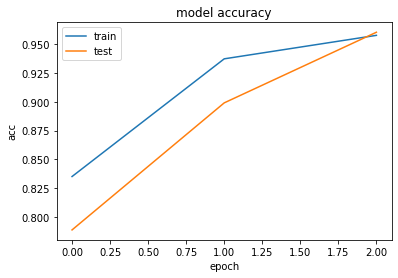

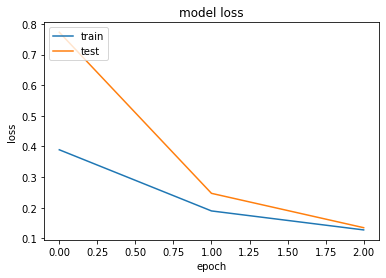

In [16]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# resumir o histórico para precisão (accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# resumir o histórico de perda (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a id='resultado_um'></a>
<h3><strong>6.1 Resultado</strong></h3>

In [17]:
scores = model_lstm.evaluate(X_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.03%


<a id='testando'></a>
<h2><strong>7. Testando Modelo</strong></h2>

<p style="text-align: justify;">
Após a conclusão do modelo de predição, foi criado um pequeno conjunto de dados para testes, composto de 20 notícias, sendo 10 notícias consideradas verdades extraidas de sites confiáveis como CNN, The New York Times, Aljazeera, Bloomberg, Reuters, e 10 notícias de sites não conhecidos, ou pouco confiáveis como, Viral Cord, The Onion, Real News Right Now, Empire News, National Report. Estas notícias foram retiradas do site chamado FACTITIOUS, uma plataforma de jogos, onde o desafio é identificar se a notícia falsa ou não. 
<p style="text-align: justify;">
A estrutura do conjunto de dados para teste segue abaixo:
</p>

  id  |  title  |  author  |  text  |    label    |  journal  |
----- | ------- | -------- | ------ | ----------- | --------- |
 0-20 | notícia | escritor | matéria| fake ou não |   local   |


**Recebendo Conjunto de Dados**

In [28]:
path_test = 'resources/datasets/test.csv'
test_data = pd.read_csv(path_test, header=0, encoding = 'unicode_escape',sep=';')
test_data.head()

,id,title,author,text,label,journal
0,0,Bernie Sanders had a heart attack,Deanna Hackney and Caroline Kelly,(CNN)Democratic presidential candidate Sen. Be...,0,cnn
1,1,Alabama Requires Birth Certificate To Use Publ...,Viral Cords,Alabama is the first country to enact insane b...,1,Viral Cords
2,2,Iranian Hackers Target Trump Campaign as Threa...,Nicole Perlroth and David E. Sanger,SAN FRANCISCO  The 2020 presidential election...,0,the new york times
3,3,Buckingham Palace Guards Impressed By First La...,the onion,LONDONSaying the first ladys skills were of ...,1,the onion
4,4,Los Angeles Tap Water Contains 18% Xanax and 7...,Viral Cords,In new Environmental Protection Agency (EPA) f...,1,Viral Cords


In [29]:
test_data ['title_author_text'] = test_data ['title'] + ' ' + test_data ['author'] + ' ' + test_data ['text']
test_data ['len_title_author_text'] = [len(str(x)) for x in test_data ['title_author_text']]

**Detalhes do Dataset**

In [30]:
detail = test_data['len_title_author_text'].describe()
print(detail)

count      20.000000
mean     3441.100000
std      2768.796126
min       908.000000
25%      1437.500000
50%      2155.500000
75%      4816.500000
max      9677.000000
Name: len_title_author_text, dtype: float64


**Separação**

In [31]:
X_test = test_data['title_author_text']
Y_test = test_data['label']

**Tokenização**

In [32]:
num_token = 6531
token = Tokenizer(num_words = num_token, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
token.fit_on_texts(X_train.astype(str))

**Sequência**

In [33]:
max_review_length = 6531

X_train_token = token.texts_to_sequences(X_train.astype(str))
X_test_token = token.texts_to_sequences(X_test.astype(str))

X_train_seq = sequence.pad_sequences(X_train_token, maxlen=max_review_length)
X_test_seq = sequence.pad_sequences(X_test_token, maxlen=max_review_length)

**Utilizando Modelo**

In [34]:
from keras.models import model_from_json

json_file = open('model_lstm.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model_ltsm.h5")
print("Modelo carregado do Arquivo")

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Modelo carregado do Arquivo


**Resultado**

In [35]:
scores = loaded_model.evaluate(X_test_seq, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

acc: 75.00%


**Predição**

In [36]:
predictions = loaded_model.predict_classes(X_test_seq)

In [37]:
print(predictions.shape)

(20, 1)


In [38]:
rounded = [np.round(x) for x in predictions]
rounded

[array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1])]

<p style="text-align: justify;">
Os dados tem a seguinte informação:
</p>

- 0 Notícia Verdadeira
- 1 Notícia Falsa


  id |   Dado do Dataset  |  Resultado do Teste  | 
 --- | ------------------ | -------------------- |
   0 |          0         |           1          |
   1 |          1         |           1          |
   2 |          0         |           0          |
   3 |          1         |           1          |
   4 |          1         |           1          |
   5 |          0         |           0          |
   6 |          1         |           1          |
   7 |          1         |           1          |
   8 |          0         |           1          |
   9 |          1         |           1          |
  10 |          1         |           1          |
  11 |          0         |           0          |
  12 |          0         |           1          |
  13 |          1         |           1          |
  14 |          0         |           0          |
  15 |          1         |           1          |
  16 |          0         |           0          |
  17 |          1         |           1          |
  18 |          0         |           1          |
  19 |          0         |           1          |
  
<p style="text-align: justify;">
Conforme visto acima obtivemos 15 acertos de 20. Um resultado satisfatório para o projeto proposto.
</p>

<h2>&nbsp;</h2>

<a id='referencias'></a>
<h2><strong>REFERÊNCIAS</strong></h2>

<p style="text-align: justify;">[1] UTK Machine Learning Club. Fake News - Build a system to identify unreliable news articles. 2017. Dispon&iacute;vel em: &lt;https://www.kaggle.com/c/fake-news/data.&gt;. Acesso em: 28 jul. 2019.</p>

<p style="text-align: justify;">[2] BROWNLEE, Jason. Display Deep Learning Model Training History in Keras. Dispon&iacute;vel em: &lt;https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/. Acesso em: 02 out. 2019.</p>

<p style="text-align: justify;">[3] AQUINO, Bruno. 5-fold LSTM Attention (fully commented). Dispon&iacute;vel em: &lt;https://www.kaggle.com/braquino/5-fold-lstm-attention-fully-commented-0-694/. Acesso em: 03 out. 2019.</p>

<p style="text-align: justify;">[4] AU Game Lab, the JoLT program. factitious project. Dispon&iacute;vel em: &lt;http://factitious.augamestudio.com/#/. Acesso em: 04 out. 2019.</p>

<p style="text-align: justify;">[5] SUHANKO, Djames. Como salvar um model treinado com Keras. Dispon&iacute;vel em: &lt;https://www.dobitaobyte.com.br/como-salvar-um-model-treinado-com-keras/. Acesso em: 04 out. 2019.</p>

<h2>&nbsp;</h2>

*INSTALLED VERSIONS*

In [39]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 5.0.1
pip: 19.1.1
setuptools: 41.0.1
Cython: None
numpy: 1.16.4
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.5.0
sphinx: None
patsy: None
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.1.1
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.3.4
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


<h2>&nbsp;</h2>

***